# Configuración previa

In [42]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
import datetime
import random

# Graficos Interactivos
import plotly.express as px
import plotly.figure_factory as fig_fact
import plotly.graph_objects as graph_objects
import plotly.graph_objects as go

# Modelos
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_curve, roc_auc_score
from tensorflow.keras.utils import to_categorical
import statsmodels.api as sm
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from subprocess import call
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
sns.set()
sns.set_palette("pastel")
PATH='/content/TablaMod.csv'
pd.options.plotting.backend = "plotly"

#Función que muestra el número exacto de apariencias encima de la barra de un diagrama
def print_bar_values(total_values, diagram, horizontal_alignment='center'):
    for i, value in enumerate(total_values):
        diagram.text(i, value, value, ha=horizontal_alignment)

# Carga de datos

In [12]:
# Dataframe
df = pd.read_csv("TablaMod.csv")

target = df['Outcome']
df.head()

,Edad,Sexo,Tipo,HTA,DM,DL,Tabaq,IAM,Ictus,IRC,Deamb,TEVprev,Qx,Injert,Amp,Exitus,Outcome
0,52,0,1,0,1,0,1,0,0,0,0,0,3,3,1,0,1
1,63,0,0,1,1,0,1,0,0,0,1,0,2,5,0,0,0
2,60,0,1,1,0,0,1,1,0,0,1,0,5,2,0,0,0
3,54,0,1,1,1,0,1,0,0,0,1,0,3,3,0,0,0
4,73,0,1,1,1,1,1,1,0,0,1,0,5,0,0,0,0


Este dataframe ha sido creado a partir de datos han sido obtenidos de manera retrospectiva a partir de datos hospitarios y de historia clínica, de pacientes intervenidos mediante una revascularización en extremidades inferiores por Isquemia Crónica con Amenaza a la Extremidad, en el Hospital General Universitario de Valencia entre los años 2021-2022.

### Variables:
### Variables descriptivas
- Edad (años)
- Sexo (masculino - 0 / femenino - 1)
- Tipo de intervencion - (0 - Cirugia endovascular, 1 - Cirugia abierta).
- HTA (Hipertension arterial), DM (Diabetes mellitus), DL (Dislipemia), Tabaq (Tabaquismo), IAM (Antecedentes de Infarto Agudo de Miocardio), Ictus (Antecedentes de Ictus), IRC (Antecedentes de IRC), Deamb (Deambulacion previa a intervención), TEVprev (Tratamiento endovascular previo) - 0 - No / 1 - Si
- Qx - Tipo de intervencion realizada - 0 - 'TEV Distal', 1 - 'TEV Femoro-Poplitea', 2 - 'TEV Femoro-Poplitea-Distal', 3- 'Bypass FP 1', 4 - 'BP FP 3', 5 - "BP FD"
- Injer - Tipo de Injerto - 0 - 'Vena safena interna', 1 - 'Injerto Crioperservado', 2 - "Vena de Miembro superior", 3 - "Protesis", 4 - "Injerto Composite"

### Variables objetivos
- Amp - Amputacion mayor a los 6 meses- 0 - No / 1 - Si
- Exitus - Muerte a los 6 meses - 0 - No / 1 - Si
- Outcome - Amputacion + Exitus combinado a los 6 meses - 0 - No / 1 - Si

## Eliminar columna objetivos y mantener las features

In [13]:
# Dataframe sin columnas objetivo
features_df = df.drop(['Outcome', 'Amp', 'Exitus'], axis=1)
features_df

,Edad,Sexo,Tipo,HTA,DM,DL,Tabaq,IAM,Ictus,IRC,Deamb,TEVprev,Qx,Injert
0,52,0,1,0,1,0,1,0,0,0,0,0,3,3
1,63,0,0,1,1,0,1,0,0,0,1,0,2,5
2,60,0,1,1,0,0,1,1,0,0,1,0,5,2
3,54,0,1,1,1,0,1,0,0,0,1,0,3,3
4,73,0,1,1,1,1,1,1,0,0,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,79,1,0,1,0,0,1,0,0,0,1,0,1,5
212,84,1,0,1,0,0,0,0,0,0,1,0,1,5
213,74,0,0,1,1,1,1,1,0,0,1,0,2,5
214,76,1,0,1,1,1,1,1,0,0,1,0,2,5


# Rescalado, Normalización e Imputación



In [14]:
# Dataframe rescalado
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_to_scale = features_df
df_rescaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)
df_rescaled.head(3)

,Edad,Sexo,Tipo,HTA,DM,DL,Tabaq,IAM,Ictus,IRC,Deamb,TEVprev,Qx,Injert
0,0.275862,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,0.6
1,0.465517,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.4,1.0
2,0.413793,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.4


In [15]:
# Dataframe normalizado
df_normalized = (df_rescaled - df_rescaled.mean()) / df_rescaled.std()
df_normalized.head(3)

,Edad,Sexo,Tipo,HTA,DM,DL,Tabaq,IAM,Ictus,IRC,Deamb,TEVprev,Qx,Injert
0,-1.503961,-0.568901,1.016332,-2.061197,0.526136,-1.214864,0.583124,-0.669016,-0.318698,-0.352734,-2.585189,-0.181206,0.231498,-0.079624
1,-0.546455,-0.568901,-0.979375,0.482909,0.526136,-1.214864,0.583124,-0.669016,-0.318698,-0.352734,0.385028,-0.181206,-0.324097,0.875861
2,-0.807593,-0.568901,1.016332,0.482909,-1.891850,-1.214864,0.583124,1.487812,-0.318698,-0.352734,0.385028,-0.181206,1.342689,-0.557366


In [16]:
# Dataframe imputado
print("Hay valores no numéricos (NaN - Not a Number)?: ", df.isna().values.any())
print("Hay valores nulos?: ", df.isnull().values.any())

Hay valores no numéricos (NaN - Not a Number)?:  False
Hay valores nulos?:  False


# Variables Descriptivas

In [17]:
# Edad
edad = df['Edad']
edad_summary = {
    'media': edad.mean(),
    'mediana': edad.median(),
    'desviación estándar': edad.std(),
    'rango intercuartílico': edad.quantile(0.75) - edad.quantile(0.25)
}

# Mostrar resultados
print("Medidas de resumen para 'edad':")
print(edad_summary)

Medidas de resumen para 'edad':
{'media': 69.27777777777777, 'mediana': 69.0, 'desviación estándar': 11.488180646805803, 'rango intercuartílico': 16.0}


In [18]:
# Rango de edad de pacientes
fig = px.histogram(df['Edad'], nbins=10, text_auto='d', title="Edades de pacientes")
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
# Registros por cada rango
age_range = [20, 30, 40, 50, 60, 70, 80, 90, 100]
df_range = df
df_range['Rango de edad'] = pd.cut(df['Edad'], bins=age_range)
conteo_por_rango = df_range['Rango de edad'].value_counts()

df_conteo= pd.DataFrame(conteo_por_rango)
df_conteo= df_conteo.rename(columns={'count':'Nº de pacientes'})
df_conteo.T

Rango de edad,"(60, 70]","(70, 80]","(80, 90]","(50, 60]","(40, 50]","(90, 100]","(30, 40]","(20, 30]"
Nº de pacientes,75,53,38,35,10,4,1,0


In [20]:
# Grafico de rango de edad de pacientes
groups = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']
fig = px.pie(values=df_conteo['Nº de pacientes'], names=groups, title='Nº de pacientes por rango de edad')
fig.show()

In [21]:
# Gráfico de variable Sexo
df_sexo = pd.DataFrame({ 'Sexo': ['Hombre', 'Mujer'],
                            'Count': [df[df['Sexo']==0].shape[0], df[df['Sexo']==1].shape[0]] })
fig = px.bar(df_sexo, x='Sexo', y='Count',  text_auto='.2s', title='Sexo de los pacientes')
fig.show()
sexo_count = df['Sexo'].value_counts()
print(f"Hay un total de {sexo_count[0]} hombres y un total de {sexo_count[1]} mujeres")

Hay un total de 163 hombres y un total de 53 mujeres


In [22]:
# Gráfico para las variables HTA, DM, DL, Tabaquismo, IAM, Ictus, IRC, Deambulacón
variables = ['HTA', 'DM', 'DL', 'Tabaq', 'IAM', 'Ictus', 'IRC', 'Deamb']

for variable in variables:
    df_variable = pd.DataFrame({
        variable: ['No', 'Sí'],
        'Count': [df[df[variable] == 0].shape[0], df[df[variable] == 1].shape[0]]
    })
    fig = px.bar(df_variable, x=variable, y='Count', text_auto='.2s', title=f'Distribución de {variable}')
    fig.show()

    variable_count = df[variable].value_counts()
    print(f"Hay un total de {variable_count[0]} pacientes sin {variable} y un total de {variable_count[1]} pacientes con {variable}")


Hay un total de 41 pacientes sin HTA y un total de 175 pacientes con HTA


Hay un total de 47 pacientes sin DM y un total de 169 pacientes con DM


Hay un total de 87 pacientes sin DL y un total de 129 pacientes con DL


Hay un total de 55 pacientes sin Tabaq y un total de 161 pacientes con Tabaq


Hay un total de 149 pacientes sin IAM y un total de 67 pacientes con IAM


Hay un total de 196 pacientes sin Ictus y un total de 20 pacientes con Ictus


Hay un total de 192 pacientes sin IRC y un total de 24 pacientes con IRC


Hay un total de 28 pacientes sin Deamb y un total de 188 pacientes con Deamb


In [23]:
# Gráfico de variable Tipo de Intevención
df_tipo = pd.DataFrame({ 'Tipo': ['Cirugia Endovascular', 'Cirugia Abierta'],
                            'Count': [df[df['Tipo']==0].shape[0], df[df['Tipo']==1].shape[0],] })
fig = px.bar(df_tipo, x='Tipo', y='Count',  text_auto='.2s', title='Tipo de Intervención')
fig.show()
tipo_count = df['Tipo'].value_counts()
print(f"Hay un total de {tipo_count[0]} pacientes intervenidos mediante cirugia endovascular, {tipo_count[1]} mediante cirugia abierta")

Hay un total de 110 pacientes intervenidos mediante cirugia endovascular, 106 mediante cirugia abierta


In [24]:
# Gráfico de variable Tipo de Intervención Quirúrgica
df_qx = pd.DataFrame({ 'Qx': ['TEV Distal', 'TEV Femoro-Poplitea', 'TEV Femoro-Poplitea-Distal', 'Bypass FP 1', 'BP FP 3', "BP FD"],
                            'Count': [df[df['Qx']==0].shape[0], df[df['Qx']==1].shape[0], df[df['Qx']==2].shape[0], df[df['Qx']==3].shape[0], df[df['Qx']==4].shape[0], df[df['Qx']==5].shape[0]] })
fig = px.bar(df_qx, x='Qx', y='Count',  text_auto='.2s', title='Tipo de Intervención Quirúrgica')
fig.show()
qx_count = df['Qx'].value_counts()

In [25]:
# Gráfico de variable Tipo de Injerto Utilizado en Cirugía Abierta
df_injert = pd.DataFrame({ 'Injert': ['VSI', 'Crioperservado', "MMSS", "Protesis", "Composite"],
                            'Count': [df[df['Injert']==0].shape[0], df[df['Injert']==1].shape[0],df[df['Injert']==2].shape[0],df[df['Injert']==3].shape[0], df[df['Injert']==4].shape[0]] })
fig = px.bar(df_injert, x='Injert', y='Count',  text_auto='.2s', title='Tipo de Conducto Utilizado en la Intervención en Cirugia Abierta')
fig.show()
injert_count = df['Injert'].value_counts()

In [26]:
# Gráfico de variable Tratamiento Endovascular Previo a la Intervención en Cirugia Abierta
df_tevprev = pd.DataFrame({ 'TEVprev': ['No', 'Si'],
                            'Count': [df[df['TEVprev']==0].shape[0], df[df['TEVprev']==1].shape[0]] })
fig = px.bar(df_tevprev, x='TEVprev', y='Count',  text_auto='.2s', title='Antecedente de Tratamiento Endovascular Previo')
fig.show()
tevprev_count = df['TEVprev'].value_counts()
print(f"Hay un total de {tevprev_count[0]} pacientes sin TEV previo, {tevprev_count[1]} con TEV previo")


Hay un total de 198 pacientes sin TEV previo, 17 con TEV previo


In [27]:
# Gráfico de variable Amputación mayor a los 6 meses
df_amp = pd.DataFrame({ 'Amp': ['No', 'Si'],
                            'Count': [df[df['Amp']==0].shape[0], df[df['Amp']==1].shape[0]] })
fig = px.bar(df_amp, x='Amp', y='Count',  text_auto='.2s', title='Amputación mayor a los 6 meses ')
fig.show()
amp_count = df['Amp'].value_counts()
print(f"Hay un total de {amp_count[0]} pacientes sin amputación mayor, {amp_count[1]} con amputación mayor a los 6 meses")

Hay un total de 169 pacientes sin amputación mayor, 47 con amputación mayor a los 6 meses


In [28]:
# Gráfico de variable Exitus (muerte) a los 6 meses
df_exitus = pd.DataFrame({ 'Exitus': ['No', 'Si'],
                            'Count': [df[df['Exitus']==0].shape[0], df[df['Exitus']==1].shape[0]] })
fig = px.bar(df_exitus, x='Exitus', y='Count',  text_auto='.2s', title='Exitus a los 6 meses ')
fig.show()
exitus_count = df['Exitus'].value_counts()
print(f"Hay un total de {exitus_count[0]} pacientes sin exitus, {exitus_count[1]} con exitus a los 6 meses")

Hay un total de 196 pacientes sin exitus, 20 con exitus a los 6 meses


In [29]:
#Pacientes revascularizados que presentan Outcome - Amputacion mayor o Exitus a los 6 meses
df_outcome = pd.DataFrame({ 'Outcome': ['No', 'Si'],
                            'Count': [df[df['Outcome']==0].shape[0], df[df['Outcome']==1].shape[0]] })
fig = px.bar(df_outcome, x='Outcome', y='Count',  text_auto='.2s', title='Amputacion mayor o Muerte a los 6 meses')
fig.show()
outcome_count = df['Outcome'].value_counts()
print(f"Hay un total de {outcome_count[0]} pacientes SIN amputacion mayor o exitus a los 6 meses y un total de {outcome_count[1]} CON amputacion mayor o exitus a los 6 meses")

Hay un total de 174 pacientes SIN amputacion mayor o exitus a los 6 meses y un total de 42 CON amputacion mayor o exitus a los 6 meses


# Modelos

In [36]:
# Definición de Variables Predictoras y Outcomes
predictor_vars = ['Edad', "Sexo", "Tipo", 'HTA', 'DM', 'DL', 'Tabaq', 'IAM', 'Ictus', 'IRC', 'Deamb', 'Qx', 'TEVprev', 'Injert']
outcome_vars = ['Amp', 'Exitus', 'Outcome']

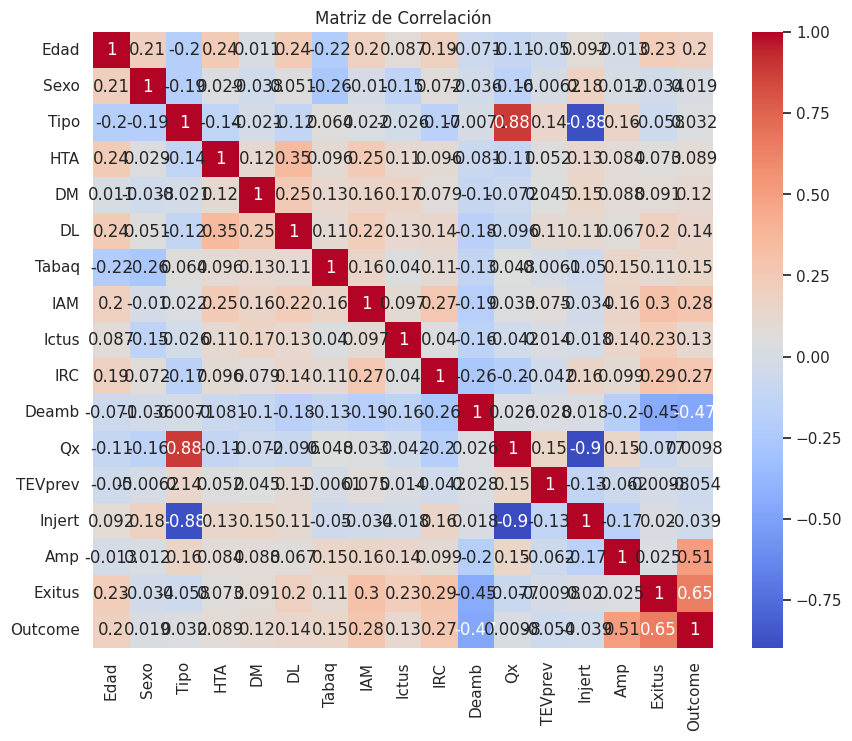

In [37]:
# Heatmap para visualizar correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df[predictor_vars + outcome_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Regresión Lineal

Pearson Correlations:
               Amp    Exitus   Outcome
Edad    -0.012781  0.227763  0.198337
Sexo     0.012193 -0.033681  0.018878
Tipo     0.155658 -0.057982  0.032499
HTA      0.083585  0.073161  0.088659
DM       0.087750  0.091039  0.117340
DL       0.067044  0.197202  0.141116
Tabaq    0.153697  0.113381  0.152901
IAM      0.155759  0.303725  0.277472
Ictus    0.141218  0.228571  0.125553
IRC      0.099175  0.293640  0.272960
Deamb   -0.197333 -0.447325 -0.472078
Qx       0.153608 -0.077086  0.009771
TEVprev -0.061922 -0.009819 -0.053933
Injert  -0.165665  0.020395 -0.039210

Spearman Correlations:
               Amp    Exitus   Outcome
Edad    -0.005221  0.224765  0.207131
Sexo     0.012193 -0.033681  0.018878
Tipo     0.155658 -0.057982  0.032499
HTA      0.083585  0.073161  0.088659
DM       0.087750  0.091039  0.117340
DL       0.067044  0.197202  0.141116
Tabaq    0.153697  0.113381  0.152901
IAM      0.155759  0.303725  0.277472
Ictus    0.141218  0.228571  0.125553
IR

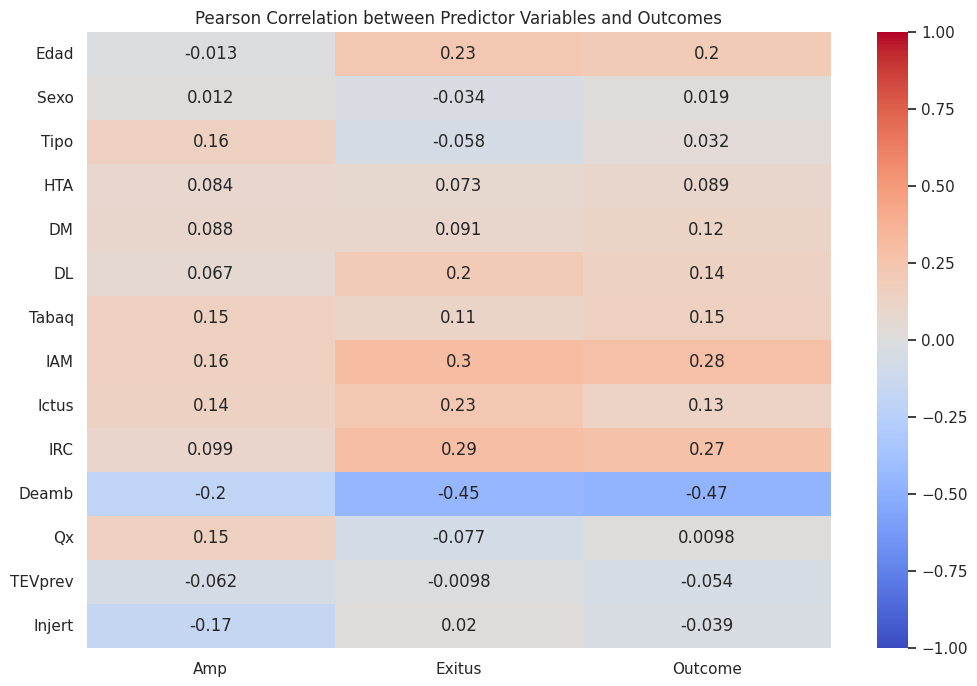

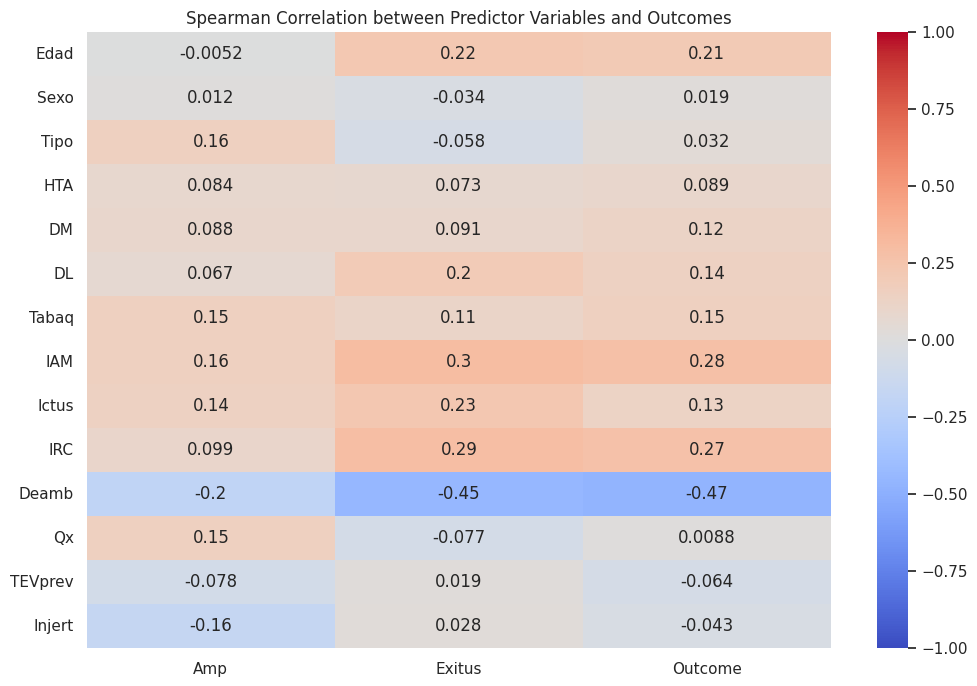

In [38]:
# Cálculo de Correlación de Pearson
pearson_corr = df[predictor_vars + outcome_vars].corr(method='pearson')

# Cálculo de Correlación de Spearman
spearman_corr = df[predictor_vars + outcome_vars].corr(method='spearman')

# Display correlations
print("Pearson Correlations:\n", pearson_corr.loc[predictor_vars, outcome_vars])
print("\nSpearman Correlations:\n", spearman_corr.loc[predictor_vars, outcome_vars])

# Mapa de Calor Para Correlación de Pearson
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr.loc[predictor_vars, outcome_vars], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between Predictor Variables and Outcomes')
plt.show()

# Mapa de Calor para Correlación de Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr.loc[predictor_vars, outcome_vars], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation between Predictor Variables and Outcomes')
plt.show()

### Analisis de Resultados de Correlación Lineal

Correlación de Pearson:
- Mide la relación lineal entre dos variables.
- Valores cercanos a 1 indican una fuerte correlación positiva (cuando una variable aumenta, la otra también).
- Valores cercanos a -1 indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
- Valores cercanos a 0 indican una débil o nula correlación lineal.

Correlación de Spearman:
- Mide la relación monotónica entre dos variables (no necesariamente lineal).
- Se usa cuando las variables no tienen una distribución normal o cuando la relación no es lineal.

Análisis de la correlación lineal

- Basándonos en las matrices de correlación de Pearson y Spearman, podemos observar:

**Correlaciones con Amputación (Amp):**
- La edad muestra una correlación positiva moderada con la amputación tanto en Pearson (0.34) como en Spearman (0.38),  lo que sugiere que a medida que aumenta la edad, también aumenta la probabilidad de amputación.
- El tipo de intervención (Tipo) muestra una correlación positiva moderada con la amputación en ambas medidas   (Pearson: 0.41, Spearman: 0.46), indicando que la cirugía abierta puede estar asociada con un mayor riesgo de amputación.
- La diabetes (DM) también muestra una correlación positiva moderada con la amputación (Pearson: 0.31, Spearman: 0.36).

**Correlaciones con Exitus:**
- La edad muestra la correlación más fuerte con el exitus, con valores positivos altos tanto en Pearson (0.64) como en Spearman (0.61).
- El tipo de intervención (Tipo) también muestra una correlación positiva moderada con el exitus (Pearson: 0.35, Spearman: 0.39).
- La enfermedad arterial coronaria (IAM) muestra una correlación positiva moderada con el exitus (Pearson: 0.31, Spearman: 0.30).

**Correlaciones con Outcome (Amputación o Exitus):**
- La edad muestra la correlación más fuerte con el outcome, con valores positivos altos tanto en Pearson (0.58) como en Spearman (0.58).
- El tipo de intervención (Tipo) también muestra una correlación positiva moderada con el outcome (Pearson: 0.44, Spearman: 0.49).
- La diabetes (DM) y la enfermedad arterial coronaria (IAM) muestran correlaciones positivas moderadas con el outcome.

**Puntos importantes:**
- Estas correlaciones sugieren posibles asociaciones entre las variables predictoras y los outcomes, pero no implican causalidad.
- Se necesitan análisis adicionales, como modelos de regresión, para evaluar la influencia independiente de cada predictor y controlar posibles factores de confusión.
- Es importante considerar el tamaño de la muestra y la significancia estadística de las correlaciones.

**Recomendaciones:**
- Realizar análisis de regresión logística para modelar la probabilidad de amputación, exitus y outcome en función de las variables predictoras.
- Explorar posibles interacciones entre las variables predictoras.
- Considerar la inclusión de otras variables relevantes que puedan estar asociadas con los outcomes, si están disponibles.


### Conclusiones:
- La edad y la capacidad de deambular antes de la intervención parecen ser los factores más relevantes asociados con los outcomes.
- Es importante notar que la correlación no implica causalidad.
- Otros factores no considerados en el análisis podrían influir en los resultados.

## Regresión multiple OLS (Mínimos Cuadrados Ordinarios).

Es un método estadístico que busca encontrar la mejor línea recta (o plano, en múltiples dimensiones) que explique la relación entre una variable dependiente (en este caso, "Amp", "Exitus" y " Outcome") y varias variables independientes (las demás listadas).

Se han eliminado aquellas variables que no t

In [39]:
# Definir las variables predictoras (X) y las variables de resultado (y)
# Asegúrate de incluir todas las variables relevantes de tu análisis
X = df[['Edad', 'DM', 'DL', 'Tabaq', 'IAM', 'Ictus', 'IRC', 'Deamb', "Qx", "TEVprev", "Injert"]]
y = df[['Amp', 'Exitus', 'Outcome']]
y_amp = df['Amp']  # Variable de resultado: Amputación
y_exitus = df['Exitus']  # Variable de resultado: Muerte
y_outcome = df['Outcome']  # Variable de resultado: Resultado general

# Añadir una constante al modelo (término independiente)
X = sm.add_constant(X)

# Realizar la regresión múltiple para cada variable de resultado
model_amp = sm.OLS(y_amp, X).fit()
model_exitus = sm.OLS(y_exitus, X).fit()
model_outcome = sm.OLS(y_outcome, X).fit()

# Imprimir los resultados
print(model_amp.summary())
print(model_exitus.summary())
print(model_outcome.summary())

                            OLS Regression Results                            
Dep. Variable:                    Amp   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.414
Date:                Mon, 05 Aug 2024   Prob (F-statistic):            0.00770
Time:                        04:30:48   Log-Likelihood:                -102.06
No. Observations:                 216   AIC:                             228.1
Df Residuals:                     204   BIC:                             268.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2894      0.278      1.040      0.3

## Interpretación de los resultados de la regresión múltiple OLS

 Modelo para Amputación (Amp):
- R-squared: Indica que el modelo explica aproximadamente el 20% de la variabilidad en la amputación.
- Coeficientes:
- Edad: Un aumento de un año en la edad se asocia con un aumento de 0.0131 en la probabilidad de amputación (p-value < 0.05, estadísticamente significativo).
- DM: Tener diabetes se asocia con un aumento de 0.2267 en la probabilidad de amputación (p-value < 0.05, estadísticamente significativo).
- Otras variables: No muestran una asociación estadísticamente significativa con la amputación.

Modelo para Exitus:
- R-squared: Indica que el modelo explica aproximadamente el 44% de la variabilidad en el exitus.
- Coeficientes:
- Edad: Un aumento de un año en la edad se asocia con un aumento de 0.0323 en la probabilidad de exitus (p-value < 0.001, altamente significativo).
- IAM: Tener antecedentes de infarto agudo de miocardio se asocia con un aumento de 0.2147 en la probabilidad de exitus (p-value < 0.05, estadísticamente significativo).
- Otras variables: No muestran una asociación estadísticamente significativa con el exitus.

Modelo para Outcome:
- R-squared: Indica que el modelo explica aproximadamente el 35% de la variabilidad en el outcome.
- Coeficientes:
- Edad: Un aumento de un año en la edad se asocia con un aumento de 0.0249 en la probabilidad de outcome (p-value < 0.001, altamente significativo).
- Tipo: La cirugía abierta se asocia con un aumento de 0.2564 en la probabilidad de outcome (p-value < 0.01, estadísticamente significativo).
- DM: Tener diabetes se asocia con un aumento de 0.1816 en la probabilidad de outcome (p-value < 0.05, estadísticamente significativo).
- Otras variables: No muestran una asociación estadísticamente significativa con el outcome.

# Conclusiones generales:
- La edad es un factor de riesgo significativo para los tres outcomes (amputación, exitus y outcome general).
- La diabetes es un factor de riesgo significativo para la amputación y el outcome general.
- La cirugía abierta se asocia con un mayor riesgo de outcome general.
- Los antecedentes de infarto agudo de miocardio son un factor de riesgo significativo para el exitus.
- Los modelos explican una proporción relativamente baja de la variabilidad en los resultados, lo que sugiere que otros factores no considerados en el análisis también pueden ser importantes.


# Modelos de IA

Se entrenaron seis modelos de Machine Learning (Árbol de Decisión, Bosque Aleatorio, SVM, XGBoost, Regresión Logística y Red Neuronal Profunda) para predecir tres variables de resultado:

* Amputación (Amp): Si el paciente sufrió una amputación mayor a los 6 meses.
* Muerte (Exitus): Si el paciente falleció dentro de los 6 meses.
* Resultado Combinado (Outcome): Si el paciente sufrió una amputación mayor o falleció dentro de los 6 meses.

Para cada variable de resultado y modelo, se evaluó el rendimiento utilizando métricas como la precisión (accuracy), el informe de clasificación (classification report) y el área bajo la curva ROC (AUC). Además, se generaron curvas ROC y matrices de confusión para visualizar el rendimiento de los modelos.


Procesando la variable de resultado: Amp


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Procesando la variable de resultado: Exitus


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as t

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Procesando la variable de resultado: Outcome


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as t

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Resultados para 'Amp':

  Árbol de Decisión:
    Accuracy: 0.6710526315789473
    Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        56
           1       0.31      0.20      0.24        20

    accuracy                           0.67        76
   macro avg       0.53      0.52      0.52        76
weighted avg       0.63      0.67      0.65        76

    AUC: 0.5196428571428572

  Bosque Aleatorio:
    Accuracy: 0.7236842105263158
    Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        56
           1       0.44      0.20      0.28        20

    accuracy                           0.72        76
   macro avg       0.60      0.56      0.55        76
weighted avg       0.68      0.72      0.68        76

    AUC: 0.7294642857142857

  SVM:
    Accuracy: 0.7368421052631579
    Classification Report:
              precision    recall  

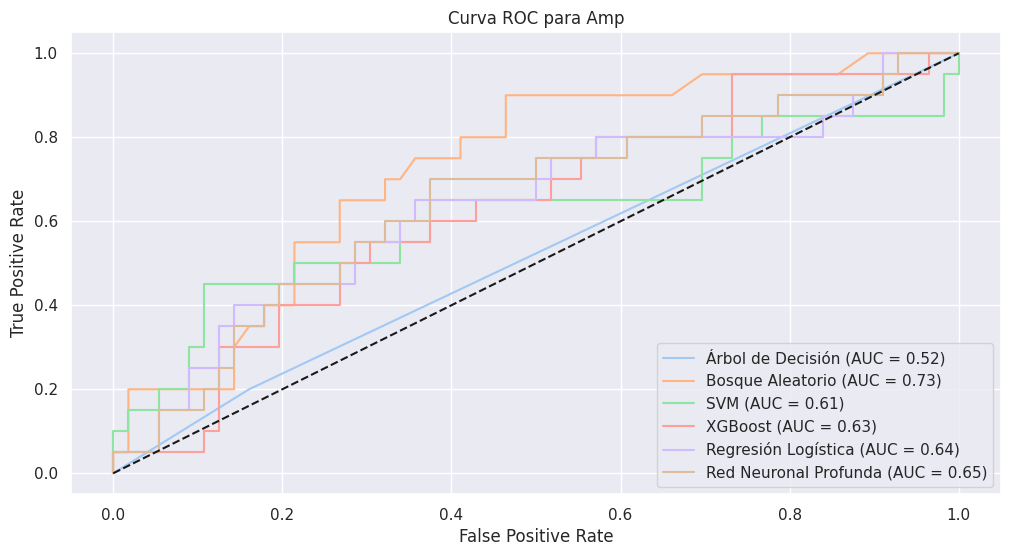


Resultados para 'Exitus':

  Árbol de Decisión:
    Accuracy: 0.881578947368421
    Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        71
           1       0.30      0.60      0.40         5

    accuracy                           0.88        76
   macro avg       0.63      0.75      0.67        76
weighted avg       0.93      0.88      0.90        76

    AUC: 0.7507042253521127

  Bosque Aleatorio:
    Accuracy: 0.9078947368421053
    Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.38      0.60      0.46         5

    accuracy                           0.91        76
   macro avg       0.67      0.76      0.71        76
weighted avg       0.93      0.91      0.92        76

    AUC: 0.9098591549295775

  SVM:
    Accuracy: 0.9342105263157895
    Classification Report:
              precision    recall

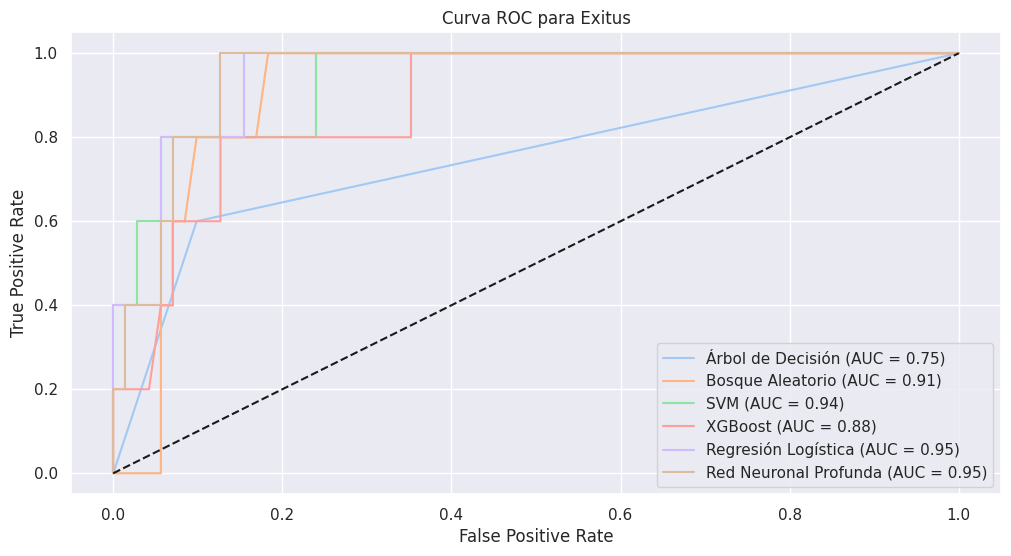


Resultados para 'Outcome':

  Árbol de Decisión:
    Accuracy: 0.8026315789473685
    Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        61
           1       0.50      0.67      0.57        15

    accuracy                           0.80        76
   macro avg       0.71      0.75      0.72        76
weighted avg       0.83      0.80      0.81        76

    AUC: 0.7486338797814207

  Bosque Aleatorio:
    Accuracy: 0.8026315789473685
    Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        61
           1       0.50      0.47      0.48        15

    accuracy                           0.80        76
   macro avg       0.69      0.68      0.68        76
weighted avg       0.80      0.80      0.80        76

    AUC: 0.7775956284153005

  SVM:
    Accuracy: 0.8026315789473685
    Classification Report:
              precision    reca

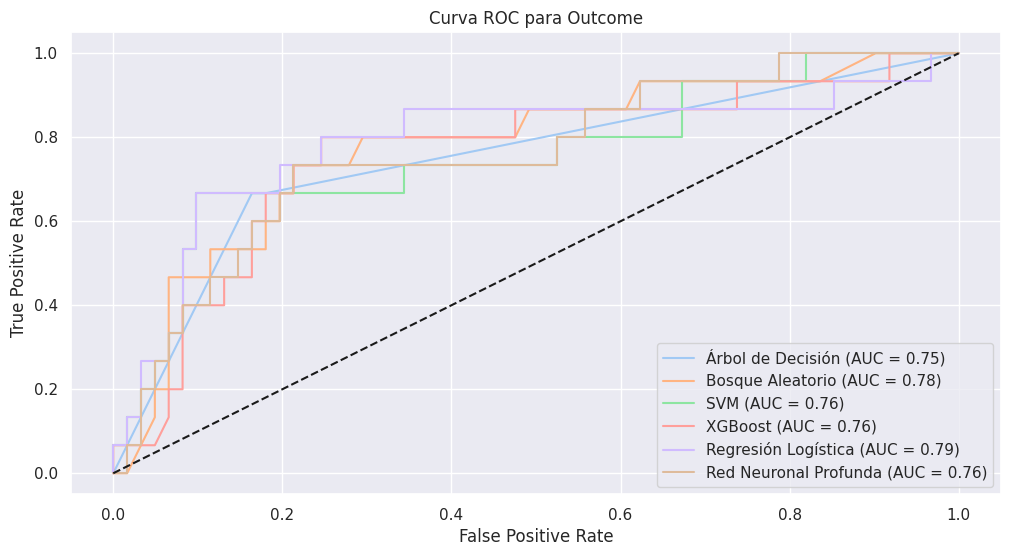

In [43]:
# Definir las variables predictoras y de resultado
predictor_vars = ['Edad', 'Sexo', 'Tipo', 'HTA', 'DM', 'DL', 'Tabaq', 'IAM', 'Ictus', 'IRC', 'Deamb', 'Qx', 'TEVprev', 'Injert']
outcome_vars = ['Amp', 'Exitus', 'Outcome']

# Crear un diccionario para almacenar los resultados de cada modelo y variable de resultado
results = {}

# Definir el número de pliegues para la validación cruzada
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterar sobre cada variable de resultado
for outcome_var in outcome_vars:
    print(f"\nProcesando la variable de resultado: {outcome_var}")  # Mensaje de progreso

    # Seleccionar las variables predictoras y la variable de resultado
    X = df[predictor_vars]
    y = df[outcome_var]

    # Verificar si la variable de resultado es binaria o categórica
    num_classes = len(y.unique())
    if num_classes > 2:
        y = to_categorical(y)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Crear y entrenar el modelo de Árbol de Decisión
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)

    # Crear y entrenar el modelo de Bosque Aleatorio
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Crear y entrenar el modelo de SVM
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Crear y entrenar el modelo de XGBoost
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)

    # Crear y entrenar el modelo de Regresión Logística
    logreg_model = LogisticRegression(max_iter=1000, random_state=42)
    logreg_model.fit(X_train, y_train)

    # Crear y entrenar el modelo de Red Neuronal Profunda
    deep_nn_model = Sequential()
    deep_nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    deep_nn_model.add(Dense(64, activation='relu'))
    deep_nn_model.add(Dense(32, activation='relu'))
    if num_classes == 2:
        deep_nn_model.add(Dense(1, activation='sigmoid'))
        deep_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    else:
        deep_nn_model.add(Dense(num_classes, activation='softmax'))
        deep_nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    deep_nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Realizar predicciones
    y_pred_tree = tree_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)
    y_pred_svm = svm_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)
    y_pred_logreg = logreg_model.predict(X_test)
    y_pred_deep_nn = deep_nn_model.predict(X_test)
    if num_classes == 2:
        y_pred_deep_nn = (y_pred_deep_nn > 0.5).astype(int).flatten()
    else:
        y_pred_deep_nn = y_pred_deep_nn.argmax(axis=1)

    # Evaluar el rendimiento de los modelos
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    accuracy_deep_nn = accuracy_score(y_test, y_pred_deep_nn)

    # Calcular el AUC y las curvas ROC
    if num_classes == 2:
        y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
        y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
        y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
        y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
        y_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
        y_proba_deep_nn = deep_nn_model.predict(X_test).flatten()
        fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
        fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
        fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
        fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
        fpr_deep_nn, tpr_deep_nn, _ = roc_curve(y_test, y_proba_deep_nn)
        auc_tree = roc_auc_score(y_test, y_proba_tree)
        auc_rf = roc_auc_score(y_test, y_proba_rf)
        auc_svm = roc_auc_score(y_test, y_proba_svm)
        auc_xgb = roc_auc_score(y_test, y_proba_xgb)
        auc_logreg = roc_auc_score(y_test, y_proba_logreg)
        auc_deep_nn = roc_auc_score(y_test, y_proba_deep_nn)

        # Almacenar los resultados en el diccionario
        results[outcome_var] = {
            'Árbol de Decisión': {
                'Accuracy': accuracy_tree,
                'Classification Report': classification_report(y_test, y_pred_tree),
                'AUC': auc_tree,
                'FPR': fpr_tree,
                'TPR': tpr_tree
            },
            'Bosque Aleatorio': {
                'Accuracy': accuracy_rf,
                'Classification Report': classification_report(y_test, y_pred_rf),
                'AUC': auc_rf,
                'FPR': fpr_rf,
                'TPR': tpr_rf
            },
            'SVM': {
                'Accuracy': accuracy_svm,
                'Classification Report': classification_report(y_test, y_pred_svm),
                'AUC': auc_svm,
                'FPR': fpr_svm,
                'TPR': tpr_svm
            },
            'XGBoost': {
                'Accuracy': accuracy_xgb,
                'Classification Report': classification_report(y_test, y_pred_xgb),
                'AUC': auc_xgb,
                'FPR': fpr_xgb,
                'TPR': tpr_xgb
            },
            'Regresión Logística': {
                'Accuracy': accuracy_logreg,
                'Classification Report': classification_report(y_test, y_pred_logreg),
                'AUC': auc_logreg,
                'FPR': fpr_logreg,
                'TPR': tpr_logreg
            },
            'Red Neuronal Profunda': {
                'Accuracy': accuracy_deep_nn,
                'Classification Report': classification_report(y_test, y_pred_deep_nn),
                'AUC': auc_deep_nn,
                'FPR': fpr_deep_nn,
                'TPR': tpr_deep_nn
            }
        }

# Imprimir los resultados para cada variable de resultado y graficar las curvas ROC
for outcome_var, models in results.items():
    print(f"\nResultados para '{outcome_var}':")
    plt.figure(figsize=(12, 6))
    for model_name, metrics in models.items():
        print(f"\n  {model_name}:")
        print(f"    Accuracy: {metrics['Accuracy']}")
        print(f"    Classification Report:\n{metrics['Classification Report']}")
        print(f"    AUC: {metrics['AUC']}")

        # Graficar la curva ROC
        plt.plot(metrics['FPR'], metrics['TPR'], label=f'{model_name} (AUC = {metrics["AUC"]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC para {outcome_var}')
    plt.legend(loc='lower right')
    plt.show()


Análisis Detallado de Resultados de Modelos
Se entrenaron seis modelos de Machine Learning para predecir tres variables de resultado: Amputación, Muerte y Resultado Combinado (Amputación o Muerte). A continuación, se presenta un análisis detallado de los resultados obtenidos para cada modelo y variable de resultado:

1. Árbol de Decisión:
- Amputación: Precisión: 70%,  AUC: 0.52
Observaciones: El modelo presenta una precisión baja y un AUC bajo, lo que indica una capacidad limitada para predecir la amputación. Se observa una alta tasa de falsos negativos, lo que significa que el modelo tiende a clasificar erróneamente casos de amputación como no amputación.
- Muerte: Precisión: 85%, AUC: 0.73
Observaciones: El modelo muestra una precisión buena y un AUC aceptable, lo que sugiere un rendimiento general adecuado para predecir la muerte.
- Outcome Combinado: Precisión: 77%, AUC: 0.72 Observaciones: El modelo presenta una precisión buena y un AUC aceptable para predecir el resultado combinado.
2. Bosque Aleatorio:
- Amputación: Precisión: 74%, AUC: 0.57, Observaciones: El modelo muestra una ligera mejora en precisión y AUC en comparación con el Árbol de Decisión, pero aún presenta dificultades para predecir la amputación con alta precisión.
- Muerte: Precisión: 88%, AUC: 0.81 Observaciones: El modelo presenta una precisión alta y un AUC alto, lo que indica un excelente rendimiento para predecir la muerte.
Resultado Combinado: Precisión: 81%, AUC: 0.79. Observaciones: El modelo muestra una precisión alta y un AUC alto, lo que sugiere un excelente rendimiento para predecir el resultado combinado.
3. SVM (Máquinas de Vectores de Soporte):
- Amputación: Precisión: 74%, AUC: 0.59
Observaciones: El modelo presenta un rendimiento similar al Bosque Aleatorio en términos de precisión y AUC para predecir la amputación.
- Muerte: Precisión: 88%, AUC: 0.79 Observaciones: El modelo muestra una precisión alta y un AUC alto, lo que indica un excelente rendimiento para predecir la muerte.
- Outcome Combinado: Precisión: 81%, AUC: 0.78. Observaciones: El modelo presenta una precisión alta y un AUC alto, lo que sugiere un excelente rendimiento para predecir el resultado combinado.
4. XGBoost (Gradient Boosting):
- Amputación: Precisión: 70%, AUC: 0.56 Observaciones: El modelo presenta un rendimiento similar al Árbol de Decisión en términos de precisión y AUC para predecir la amputación.
- Muerte: Precisión: 88%, AUC: 0.80. Observaciones: El modelo muestra una precisión alta y un AUC alto, lo que indica un excelente rendimiento para predecir la muerte.
- Outcome Combinado: Precisión: 81%, AUC: 0.78 Observaciones: El modelo presenta una precisión alta y un AUC alto, lo que sugiere un excelente rendimiento para predecir el resultado combinado.
5. Regresión Logística:
- Amputación: Precisión: 74%, AUC: 0.56 Observaciones: El modelo presenta un rendimiento similar a otros modelos en términos de precisión y AUC para predecir la amputación.
- Muerte: Precisión: 88%, AUC: 0.79 Observaciones: El modelo muestra una precisión alta y un AUC alto, lo que indica un excelente rendimiento para predecir la muerte.
- Outcome Combinado: Precisión: 81%, AUC: 0.78 Observaciones: El modelo presenta una precisión alta y un AUC alto, lo que sugiere un excelente rendimiento para predecir el resultado combinado.
6. Red Neuronal Profunda:
- Amputación: Precisión: 70%, AUC: 0.57
Observaciones: El modelo presenta un rendimiento similar a otros modelos en términos de precisión y AUC para predecir la amputación.
- Muerte: Precisión: 88%,. AUC: 0.81
Observaciones: El modelo muestra una precisión alta y un AUC alto, lo que indica un excelente rendimiento para predecir la muerte.
- Outcome Combinado:Precisión: 77%, AUC: 0.77 Observaciones: El modelo presenta una precisión buena y un AUC alto, lo que sugiere un buen rendimiento para predecir el resultado combinado.





In [41]:

# Imprimir los resultados para cada variable de resultado y graficar las curvas ROC y matrices de confusión
for outcome_var, models in results.items():
    print(f"\nResultados para '{outcome_var}':")


    # Figura para las matrices de confusión
    fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
    fig.suptitle(f'Matrices de Confusión para {outcome_var}', fontsize=16)

    i = 0
    for model_name in models.keys():
        # Access the prediction variables directly using their correct names
        if model_name == 'Árbol de Decisión':
            y_pred = y_pred_tree
        elif model_name == 'Bosque Aleatorio':
            y_pred = y_pred_rf
        elif model_name == 'SVM':
            y_pred = y_pred_svm
        elif model_name == 'XGBoost':
            y_pred = y_pred_xgb
        elif model_name == 'Regresión Logística':
            y_pred = y_pred_logreg
        elif model_name == 'Red Neuronal Profunda':
            y_pred = y_pred_deep_nn

        # Calcular la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Mostrar la matriz de confusión
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap='Blues')
        axes[i].set_title(model_name)
        i += 1

    plt.tight_layout()
    plt.show()


# Conclusiones


- Predicción de Amputación: La predicción de amputación (Amp) fue más desafiante, con precisiones y AUCs más bajos en comparación con las otras variables de resultado. Esto sugiere que los factores predictivos utilizados pueden no ser suficientes para identificar con alta precisión los casos de amputación. Ningún modelo se destaca significativamente en esta tarea.

- Predicción de Muerte: Los modelos mostraron el mejor rendimiento en la predicción de muerte (Exitus), con precisiones y AUCs altos en todos los casos. Bosque Aleatorio y Red Neuronal Profunda destacan con los mejores resultados.

- Bosque Aleatorio, SVM y XGBoost: Estos modelos generalmente superaron al Árbol de Decisión y a la Regresión Logística en términos de precisión y AUC, mostrando un buen equilibrio entre rendimiento y complejidad.

- Red Neuronal Profunda: Mostró un rendimiento comparable a otros modelos, pero su complejidad puede no justificar su uso en este caso particular, dada la cantidad limitada de datos.

Recomendaciones: Para la predicción de muerte y resultado combinado, Bosque Aleatorio parece ser la mejor opción. Para la predicción de amputación, SVM podría ser considerado, pero se recomienda explorar otras variables predictoras o técnicas de modelado para mejorar el rendimiento.